In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
data = pd.read_csv("C:/Users/Lenovo/Downloads/Financial Analytics data.csv")


In [3]:
# Display the first few rows of the dataset
data.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [4]:
# Drop the unnecessary column
data_cleaned = data.drop(columns=['Unnamed: 4'])

In [5]:
# Impute missing values with the median
data_cleaned['Mar Cap - Crore'].fillna(data_cleaned['Mar Cap - Crore'].median(), inplace=True)
data_cleaned['Sales Qtr - Crore'].fillna(data_cleaned['Sales Qtr - Crore'].median(), inplace=True)

In [6]:
# Descriptive statistics
descriptive_stats = data_cleaned.describe()

Text(0.5, 1.0, 'Distribution of Market Capitalization')

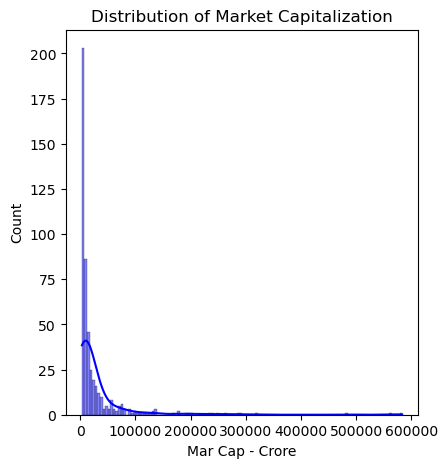

In [7]:
# Histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['Mar Cap - Crore'], kde=True, color='blue')
plt.title('Distribution of Market Capitalization')


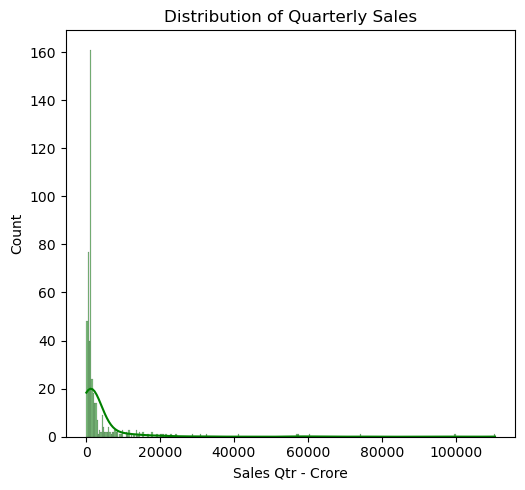

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
sns.histplot(data_cleaned['Sales Qtr - Crore'], kde=True, color='green')
plt.title('Distribution of Quarterly Sales')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Box Plot of Market Capitalization')

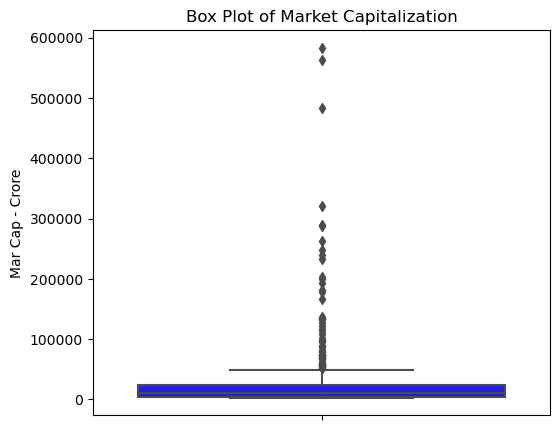

In [9]:
# Box plots
plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=data_cleaned['Mar Cap - Crore'], color='blue')
plt.title('Box Plot of Market Capitalization')


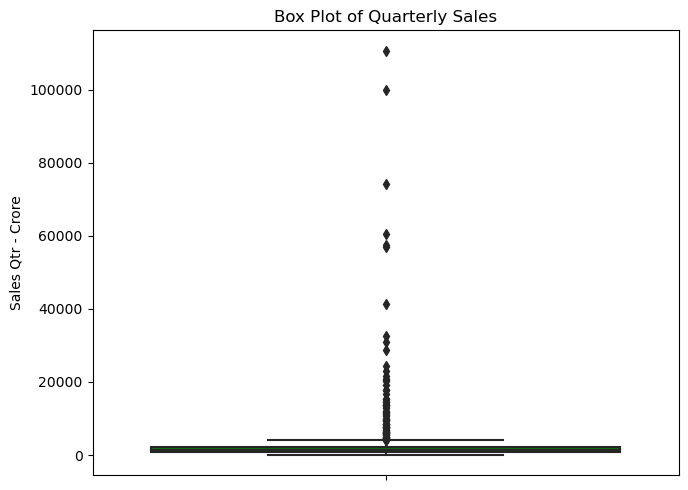

In [10]:
plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 2)
sns.boxplot(y=data_cleaned['Sales Qtr - Crore'], color='green')
plt.title('Box Plot of Quarterly Sales')

plt.tight_layout()
plt.show()

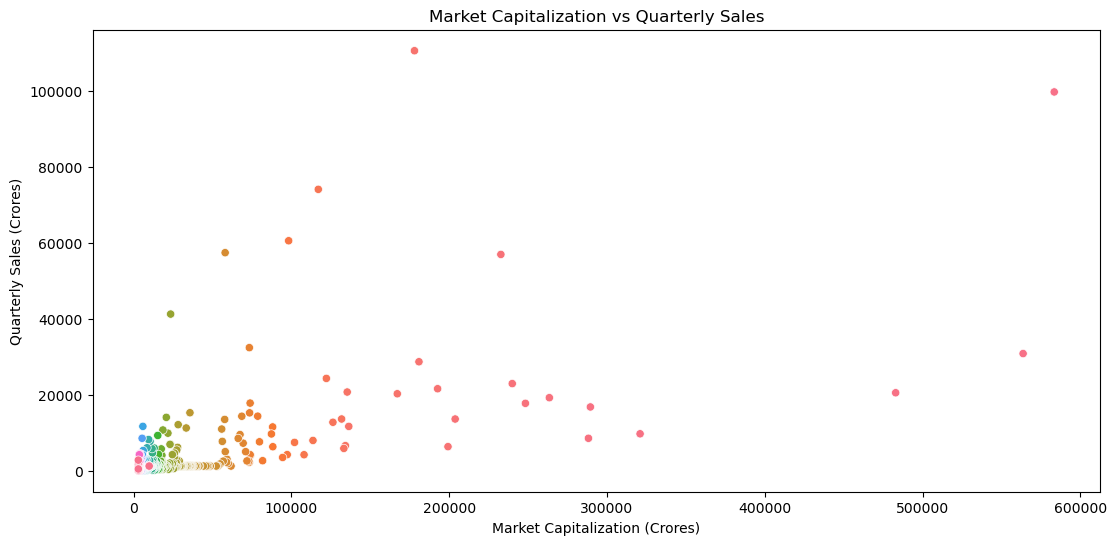

In [11]:
# Scatter plot
plt.figure(figsize=(13, 6))
sns.scatterplot(x=data_cleaned['Mar Cap - Crore'], y=data_cleaned['Sales Qtr - Crore'], hue=data_cleaned['Name'])
plt.title('Market Capitalization vs Quarterly Sales')
plt.xlabel('Market Capitalization (Crores)')
plt.ylabel('Quarterly Sales (Crores)')
plt.legend([],[], frameon=False) # Removing legend for better visualization
plt.show()

In [12]:
# Check for duplicate rows
duplicate_rows = data_cleaned.duplicated().sum()
duplicate_rows


0

In [13]:
# Identify potential outliers using IQR method
Q1 = data_cleaned[['Mar Cap - Crore', 'Sales Qtr - Crore']].quantile(0.25)
Q3 = data_cleaned[['Mar Cap - Crore', 'Sales Qtr - Crore']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data_cleaned < (Q1 - 1.5 * IQR)) | (data_cleaned > (Q3 + 1.5 * IQR))).sum()
outliers


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2628\4075214305.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((data_cleaned < (Q1 - 1.5 * IQR)) | (data_cleaned > (Q3 + 1.5 * IQR))).sum()


Mar Cap - Crore      63
Name                  0
S.No.                 0
Sales Qtr - Crore    79
dtype: int64

In [14]:
# Correlation analysis
correlation = data_cleaned[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr()
correlation


,Mar Cap - Crore,Sales Qtr - Crore
Mar Cap - Crore,1.000000,0.620489
Sales Qtr - Crore,0.620489,1.000000


In [15]:
# Top 10 companies by market capitalization
top_10_mar_cap = data_cleaned.nlargest(10, 'Mar Cap - Crore')[['Name', 'Mar Cap - Crore']]
print(f'Top 10 companies by Market Capitalization:\n{top_10_mar_cap}')

Top 10 companies by Market Capitalization:
             Name  Mar Cap - Crore
0  Reliance Inds.        583436.72
1             TCS        563709.84
2       HDFC Bank        482953.59
3             ITC        320985.27
4         H D F C        289497.37
5  Hind. Unilever        288265.26
6   Maruti Suzuki        263493.81
7         Infosys        248320.35
8         O N G C        239981.50
9  St Bk of India        232763.33


In [16]:
# Top 10 companies by quarterly sales
top_10_sales = data_cleaned.nlargest(10, 'Sales Qtr - Crore')[['Name', 'Sales Qtr - Crore']]
print(f'Top 10 companies by Quarterly Sales:\n{top_10_sales}')

Top 10 companies by Quarterly Sales:
                Name  Sales Qtr - Crore
14           I O C L          110666.93
0     Reliance Inds.           99810.00
23       Tata Motors           74156.07
27           B P C L           60616.36
54           H P C L           57474.25
9     St Bk of India           57014.08
122   Rajesh Exports           41304.84
40        Tata Steel           32464.14
1                TCS           30904.00
13   Larsen & Toubro           28747.45


In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [18]:
# Drop the unnecessary column
data_cleaned = data.drop(columns=['Unnamed: 4'])

In [19]:
# Impute missing values with the median
data_cleaned['Mar Cap - Crore'].fillna(data_cleaned['Mar Cap - Crore'].median(), inplace=True)
data_cleaned['Sales Qtr - Crore'].fillna(data_cleaned['Sales Qtr - Crore'].median(), inplace=True)

In [20]:
# Feature selection
features = data_cleaned[['Sales Qtr - Crore']]
target = data_cleaned['Mar Cap - Crore']

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [22]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [24]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

In [25]:
# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                              cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')


In [26]:
# Fit the model
grid_search_rf.fit(X_train_scaled, y_train)


D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
155 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_par

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error')

In [27]:
# Best parameters
best_params_rf = grid_search_rf.best_params_
print(f'Best parameters for Random Forest: {best_params_rf}')

Best parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [28]:
# Predict using the best model
best_rf = grid_search_rf.best_estimator_
y_pred_test_rf = best_rf.predict(X_test_scaled)


In [29]:
# Evaluation
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print(f'Testing MAE for Random Forest: {mae_test_rf}')
print(f'Testing R-squared for Random Forest: {r2_test_rf}')

Testing MAE for Random Forest: 22280.784491672013
Testing R-squared for Random Forest: 0.36344411192474657


In [30]:
# Initialize and train Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_test_lr = lr.predict(X_test_scaled)

In [31]:
# Initialize and train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_scaled, y_train)
y_pred_test_gbr = gbr.predict(X_test_scaled)


In [32]:
# Evaluation
mae_test_lr = mean_absolute_error(y_test, y_pred_test_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)

mae_test_gbr = mean_absolute_error(y_test, y_pred_test_gbr)
r2_test_gbr = r2_score(y_test, y_pred_test_gbr)

print(f'Testing MAE for Linear Regression: {mae_test_lr}')
print(f'Testing R-squared for Linear Regression: {r2_test_lr}')

print(f'Testing MAE for Gradient Boosting: {mae_test_gbr}')
print(f'Testing R-squared for Gradient Boosting: {r2_test_gbr}')

Testing MAE for Linear Regression: 20914.642450084233
Testing R-squared for Linear Regression: 0.6830428500052159
Testing MAE for Gradient Boosting: 24943.289314716516
Testing R-squared for Gradient Boosting: 0.2053813452809934


In [36]:
# Perform cross-validation for the best Random Forest model
cv_scores_rf = cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f'Cross-validated MAE for Random Forest: {-np.mean(cv_scores_rf)}')

Cross-validated MAE for Random Forest: 19355.314074418136


In [37]:
# Perform cross-validation for Linear Regression
cv_scores_lr = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f'Cross-validated MAE for Linear Regression: {-np.mean(cv_scores_lr)}')

Cross-validated MAE for Linear Regression: 22922.86069627069


In [38]:
# Perform cross-validation for Gradient Boosting
cv_scores_gbr = cross_val_score(gbr, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f'Cross-validated MAE for Gradient Boosting: {-np.mean(cv_scores_gbr)}')


Cross-validated MAE for Gradient Boosting: 21670.99673126642
